In [1]:
import json
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.ticker as tick

# insert your API key here
GLASSNODE_API_KEY = os.getenv('GLASSNODE_API_KEY')

# make API request
MVRV_data = requests.get('https://api.glassnode.com/v1/metrics/market/mvrv',
    params={'a': 'BTC', 'api_key': GLASSNODE_API_KEY})
Price_data = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_close',
    params={'a': 'BTC', 'api_key': GLASSNODE_API_KEY})
Realized_Cap_data = requests.get('https://api.glassnode.com/v1/metrics/market/marketcap_realized_usd',
    params={'a': 'BTC', 'api_key': GLASSNODE_API_KEY})
Market_Cap_data = requests.get('https://api.glassnode.com/v1/metrics/market/marketcap_usd',
    params={'a': 'BTC', 'api_key': GLASSNODE_API_KEY})
MVRV_Z_data = requests.get('https://api.glassnode.com/v1/metrics/market/mvrv_z_score',
    params={'a': 'BTC', 'api_key': GLASSNODE_API_KEY})


# convert to pandas dataframe
MVRV_df = pd.read_json(MVRV_data.text, convert_dates=['t'])
Price_df = pd.read_json(Price_data.text, convert_dates=['t'])
Realized_Cap_df = pd.read_json(Realized_Cap_data.text, convert_dates=['t'])
Market_Cap_df = pd.read_json(Market_Cap_data.text, convert_dates=['t'])
MVRV_Z_df = pd.read_json(MVRV_Z_data.text, convert_dates=['t'])

In [2]:
Market_Cap_df.rename(columns={'t':'Date', 'v':'Market_Cap'}, inplace=True)

In [3]:
Market_Cap_df = Market_Cap_df.set_index('Date')

In [4]:
Market_Cap_df

,Market_Cap
Date,
2010-07-17,1.702649e+05
2010-07-18,2.225672e+05
2010-07-19,3.138020e+05
2010-07-20,2.757412e+05
2010-07-21,2.444626e+05
...,...
2021-10-07,1.024017e+12
2021-10-08,1.025949e+12
2021-10-09,1.031192e+12


In [5]:
MVRV_df.rename(columns={'t':'Date', 'v':'MVRV'}, inplace=True)

In [6]:
MVRV_df

,Date,MVRV
0,2010-07-17,1.000000
1,2010-07-18,1.300600
2,2010-07-19,1.814750
3,2010-07-20,1.586253
4,2010-07-21,1.399411
...,...,...
4100,2021-10-07,2.519077
4101,2021-10-08,2.518883
4102,2021-10-09,2.528370
4103,2021-10-10,2.543532


In [7]:
Price_df.rename(columns={'t':'Date', 'v':'Price'}, inplace=True)

In [8]:
Price_df

,Date,Price
0,2010-07-17,0.049510
1,2010-07-18,0.085840
2,2010-07-19,0.080800
3,2010-07-20,0.074733
4,2010-07-21,0.079210
...,...,...
4101,2021-10-08,53884.290533
4102,2021-10-09,55068.643546
4103,2021-10-10,54675.093215
4104,2021-10-11,57434.240990


In [9]:
Realized_Cap_df.rename(columns={'t':'Date', 'v':'Realized_Cap'}, inplace=True)

In [10]:
Realized_Cap_df

,Date,Realized_Cap
0,2009-01-03,2.475500e+00
1,2009-01-04,NaN
2,2009-01-05,NaN
3,2009-01-06,NaN
4,2009-01-07,NaN
...,...,...
4660,2021-10-07,4.065050e+11
4661,2021-10-08,4.073032e+11
4662,2021-10-09,4.078484e+11
4663,2021-10-10,4.085543e+11


In [11]:
combined_df = pd.concat([Price_df.set_index('Date'), MVRV_df.set_index('Date'), Realized_Cap_df.set_index('Date')], axis=1, join='inner')

In [12]:
combined_df

,Price,MVRV,Realized_Cap
Date,,,
2010-07-17,0.049510,1.000000,1.702649e+05
2010-07-18,0.085840,1.300600,1.711265e+05
2010-07-19,0.080800,1.814750,1.729175e+05
2010-07-20,0.074733,1.586253,1.738318e+05
2010-07-21,0.079210,1.399411,1.746896e+05
...,...,...,...
2021-10-07,53776.542871,2.519077,4.065050e+11
2021-10-08,53884.290533,2.518883,4.073032e+11
2021-10-09,55068.643546,2.528370,4.078484e+11


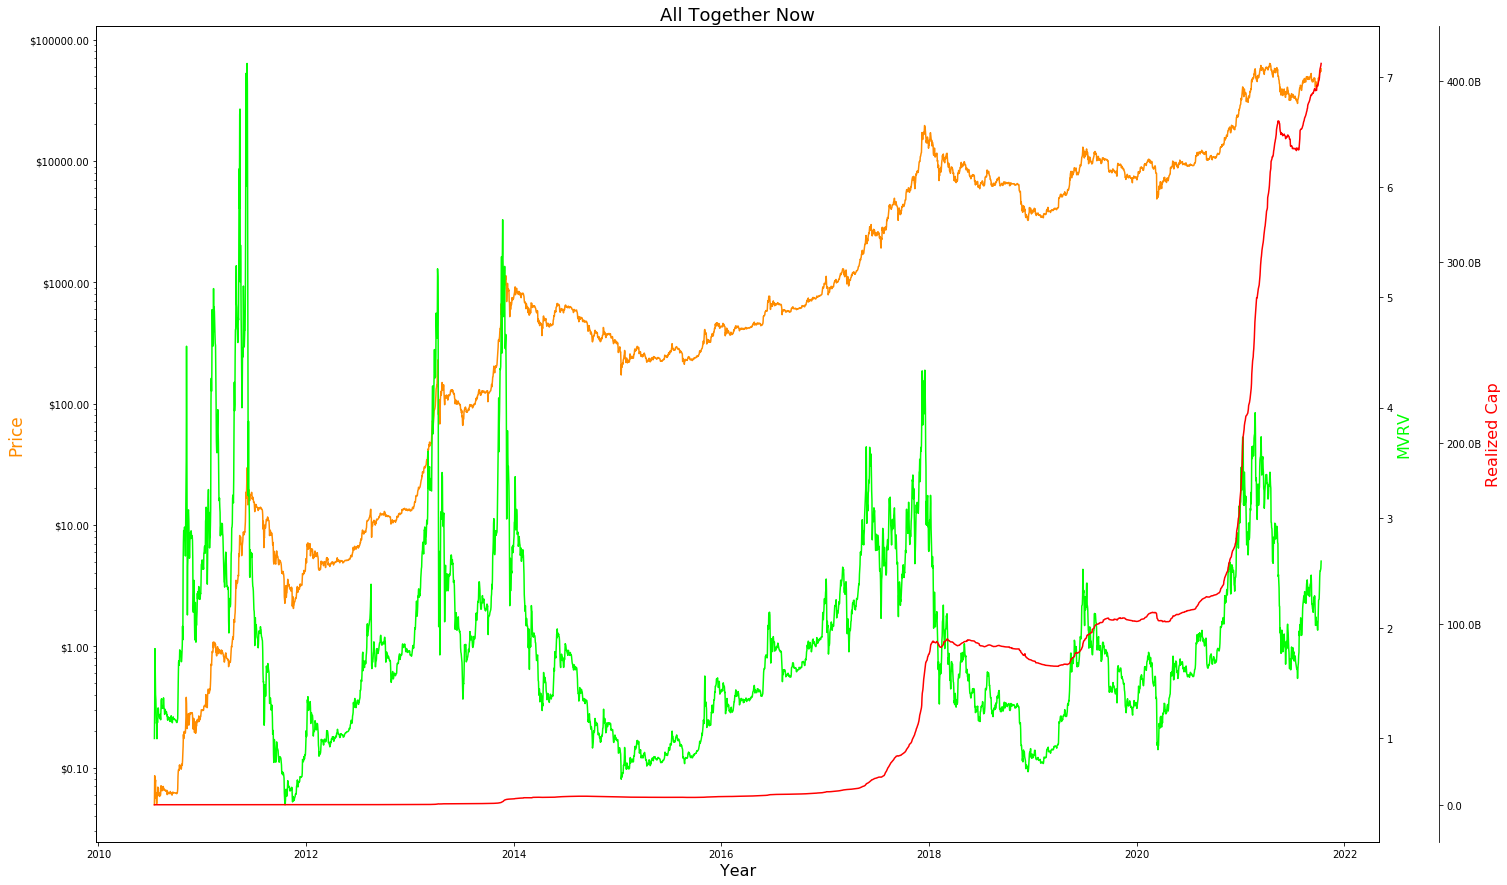

In [14]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(23,15))
# make a plot
ax.plot(combined_df.index, combined_df.Price, color="darkorange")
# set x-axis label
ax.set_xlabel("Year",fontsize=16)
# set y-axis label and scale
ax.set_ylabel("Price",fontsize=17, color='darkorange')
ax.set_yscale('log')
# title
ax.set_title('All Together Now', fontsize=18)
# format price axis to dollars
formatter = tick.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(combined_df.index, combined_df.MVRV, color="lime")
ax2.set_ylabel("MVRV",color="lime",fontsize=16)

# third axis
ax3=ax.twinx()
ax3.plot(combined_df.index, combined_df.Realized_Cap, color='red')
ax3.set_ylabel('Realized Cap', color='red', fontsize=16)

# define function to make ax3 y-values more readable
def reformat_large_tick_values(tick_val, pos):
  
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
            
    return new_tick_format

# format ax3 y-labels and positioning
ax3.formatter = tick.FormatStrFormatter('$%1.2f')
ax3.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax3.spines['right'].set_position(('outward', 60))


# plot
plt.show()

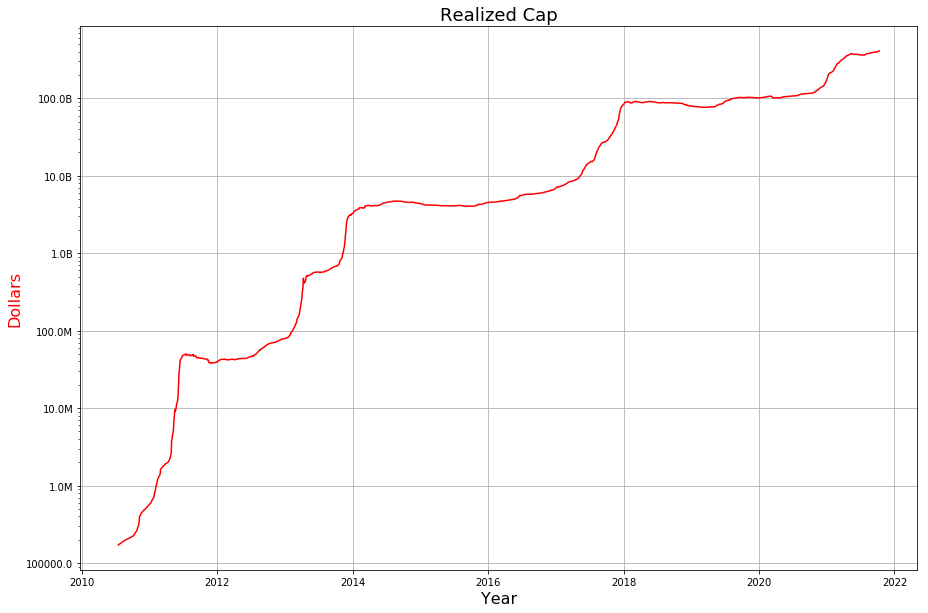

In [15]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))
# make a plot
ax.plot(combined_df.index, combined_df.Realized_Cap, color="red")
# set x-axis label
ax.set_xlabel("Year",fontsize=16)
# set y-axis label and scale
ax.set_ylabel("Dollars",fontsize=16, color='red')
ax.set_yscale('log')
# title
ax.set_title('Realized Cap', fontsize=18)
ax.grid(True)

# define function to make y-values more readable
def reformat_large_tick_values(tick_val, pos):
   
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
            
    return new_tick_format

# format ax3 y-labels and positioning
ax.formatter = tick.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))


# plot
plt.show()

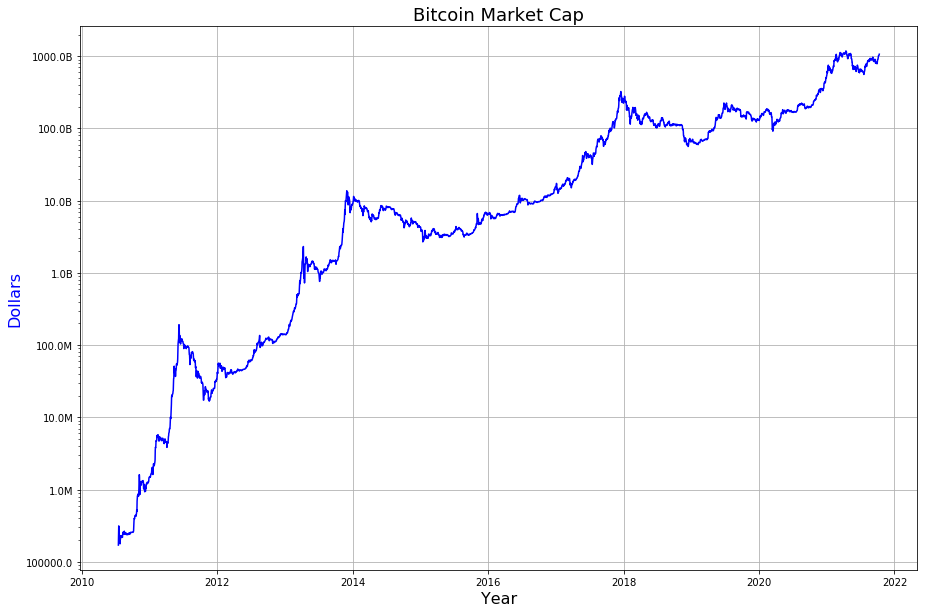

In [21]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))
# make a plot
ax.plot(Market_Cap_df.index, Market_Cap_df.Market_Cap, color="blue")
# set x-axis label
ax.set_xlabel("Year",fontsize=16)
# set y-axis label and scale
ax.set_ylabel("Dollars",fontsize=16, color='blue')
ax.set_yscale('log')
# title
ax.set_title('Bitcoin Market Cap', fontsize=18)
ax.grid(True)

# define function to make y-values more readable, turning large tick values (in the billions, millions) such as 450,000,000,000 into 450.0B
def reformat_large_tick_values(tick_val, pos):
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
            
    return new_tick_format

# format ax3 y-labels and positioning
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))


# plot
plt.show()

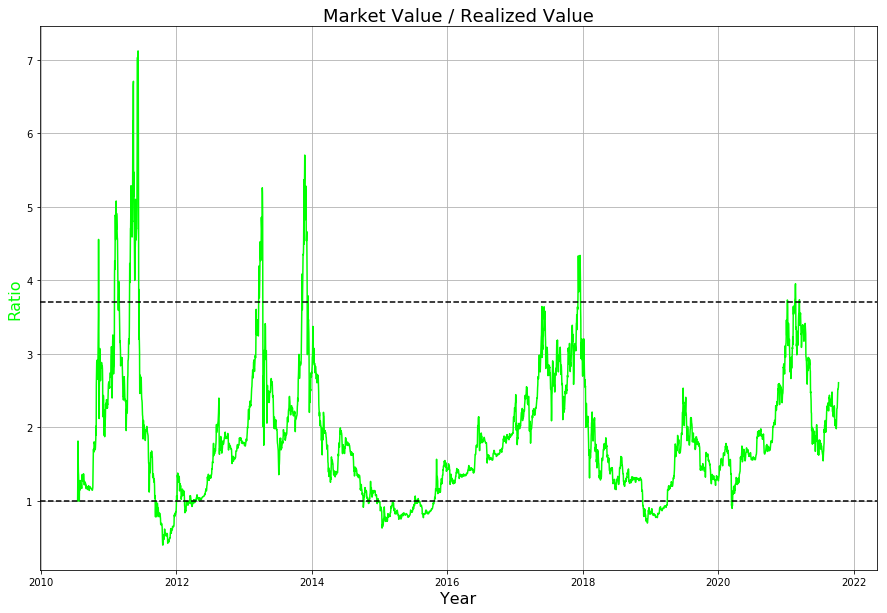

In [22]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))

# make a plot
ax.plot(combined_df.index, combined_df.MVRV, color="lime")

# set x-axis label
ax.set_xlabel("Year",fontsize=16)
# set y-axis label and scale
ax.set_ylabel("Ratio",fontsize=16, color='lime')


ax.set_title('Market Value / Realized Value', fontsize=18)
ax.grid(True)

l1=ax.axhline(1,color='black',ls='--')
l2=ax.axhline(3.7,color='black',ls='--')


# plot
plt.show()

In [23]:
MVRV_Z_df.rename(columns={'t':'Date', 'v':'Z'}, inplace=True)

In [24]:
Price_and_Z_df = pd.concat([Price_df.set_index('Date'), MVRV_Z_df.set_index('Date')], axis=1, join='inner')

In [25]:
Price_and_Z_df

,Price,Z
Date,,
2010-07-17,0.049510,-6.060000e-13
2010-07-18,0.085840,2.518053e+00
2010-07-19,0.080800,2.097027e+00
2010-07-20,0.074733,1.651545e+00
2010-07-21,0.079210,1.927019e+00
...,...,...
2021-10-07,53776.542871,2.986311e+00
2021-10-08,53884.290533,2.990908e+00
2021-10-09,55068.643546,3.093188e+00


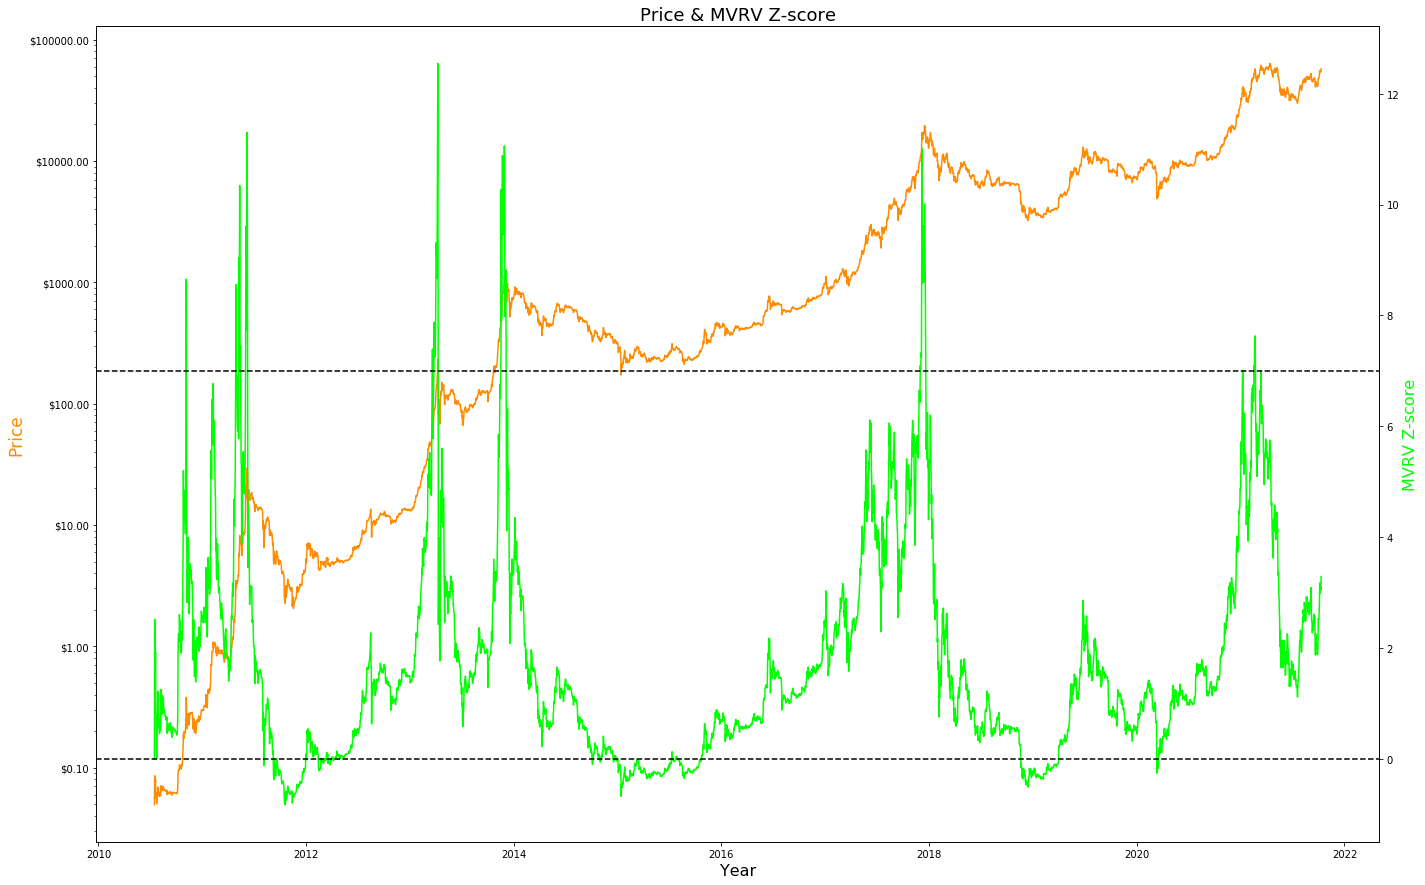

In [27]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(23,15))
# make a plot
ax.plot(Price_and_Z_df.index, Price_and_Z_df.Price, color="darkorange")
# set x-axis label
ax.set_xlabel("Year",fontsize=16)
# set y-axis label and scale
ax.set_ylabel("Price",fontsize=17, color='darkorange')
ax.set_yscale('log')
# title
ax.set_title('Price & MVRV Z-score', fontsize=18)
# format price axis to dollars
formatter = tick.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Price_and_Z_df.index, Price_and_Z_df.Z, color="lime")
ax2.set_ylabel("MVRV Z-score",color="lime",fontsize=16)

l1=ax2.axhline(0, color='black',ls='--')
l2=ax2.axhline(7, color='black',ls='--')

# plot
plt.show()